In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [40]:
democracy_data = pd.read_csv('democracy_index.csv')

In [41]:
democracy_data.tail()

,Entity,Code,Year,number_closedaut_row_owid,number_electaut_row_owid,number_electdem_row_owid,number_libdem_row_owid
1633,World,OWID_WRL,2018,23,61,55,39
1634,World,OWID_WRL,2019,24,62,53,39
1635,World,OWID_WRL,2020,24,62,56,36
1636,World,OWID_WRL,2021,28,59,58,33
1637,World,OWID_WRL,2022,30,58,58,32


In [42]:
democracy_data.rename(columns={'number_closedaut_row_owid': 'Authoritarian',
                               'number_electaut_row_owid': 'Partially Authoritarian',
                               'number_electdem_row_owid': 'Partial Democracy',
                               'number_libdem_row_owid': 'Liberal Democracy'},
                      inplace=True)
democracy_data = democracy_data.drop('Code', axis=1)

In [43]:
world_data = democracy_data[democracy_data['Entity'] == 'World']
world_data.to_csv('world_data.csv')
world_data.head()

,Entity,Year,Authoritarian,Partially Authoritarian,Partial Democracy,Liberal Democracy
1404,World,1789,50,0,0,0
1405,World,1790,51,1,0,0
1406,World,1791,51,1,0,0
1407,World,1792,50,2,0,0
1408,World,1793,50,2,0,0


In [44]:
country_data = democracy_data[~democracy_data['Entity'].isin(continents)]
country_data = country_data[country_data['Entity'] != 'World']
country_data.head()

,Entity,Year,Authoritarian,Partially Authoritarian,Partial Democracy,Liberal Democracy


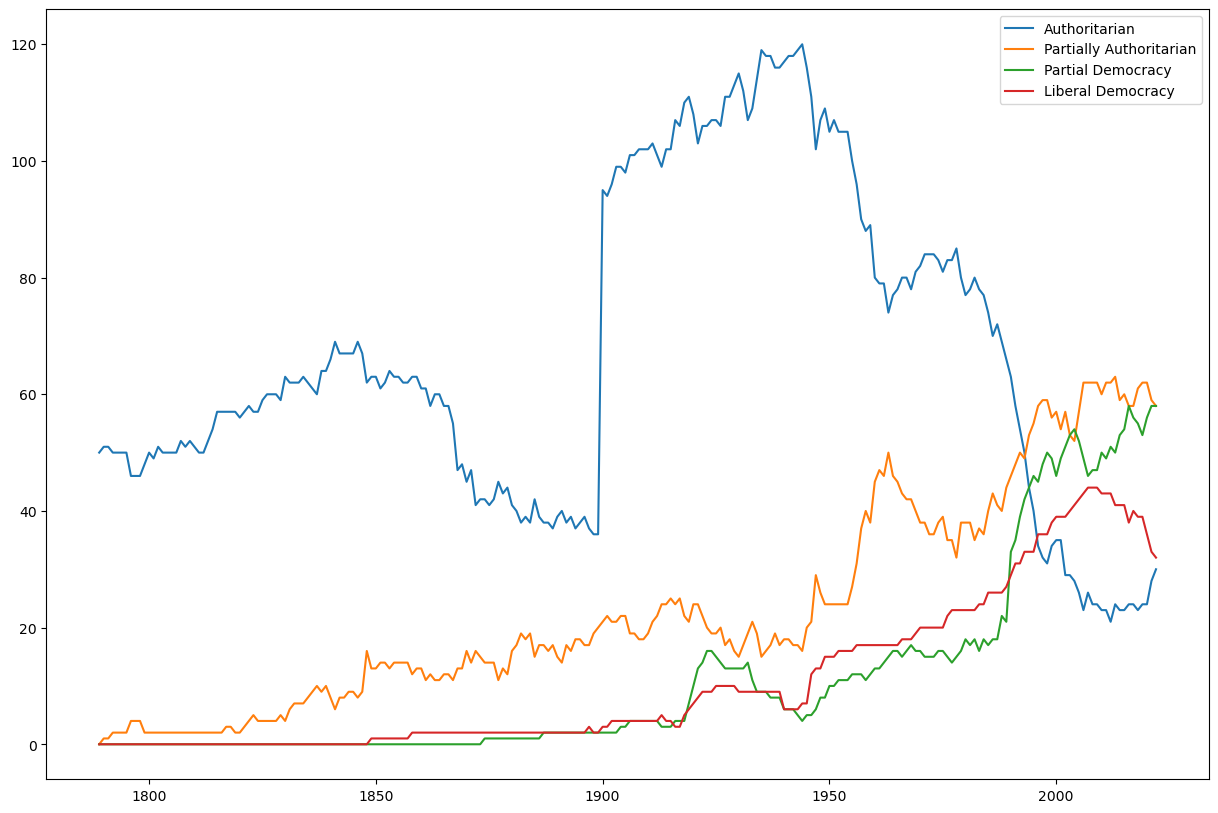

In [45]:
plt.figure(figsize=(15, 10))
plt.plot(world_data['Year'], world_data['Authoritarian'], label='Authoritarian')
plt.plot(world_data['Year'], world_data['Partially Authoritarian'], label='Partially Authoritarian')
plt.plot(world_data['Year'], world_data['Partial Democracy'], label='Partial Democracy')
plt.plot(world_data['Year'], world_data['Liberal Democracy'], label='Liberal Democracy')
plt.legend()

In [46]:
democratic_index = pd.read_csv('democracy.csv')
democratic_index.head()

,Entity,Code,Year,electdem_vdem_owid,electdem_vdem_high_owid,electdem_vdem_low_owid
0,Afghanistan,AFG,1789,0.019,0.024,0.01
1,Afghanistan,AFG,1790,0.019,0.024,0.01
2,Afghanistan,AFG,1791,0.019,0.024,0.01
3,Afghanistan,AFG,1792,0.019,0.024,0.01
4,Afghanistan,AFG,1793,0.019,0.024,0.01


In [47]:
democratic_index.rename(columns={'electdem_vdem_owid': 'Index'}, inplace=True)
democratic_index.drop(['electdem_vdem_high_owid','electdem_vdem_low_owid'], axis=1, inplace=True)
democratic_index.head()

,Entity,Code,Year,Index
0,Afghanistan,AFG,1789,0.019
1,Afghanistan,AFG,1790,0.019
2,Afghanistan,AFG,1791,0.019
3,Afghanistan,AFG,1792,0.019
4,Afghanistan,AFG,1793,0.019


In [48]:
type_ = []
for index in democratic_index['Index']:
    if index >= 0.8:
        type_.append('Liberal Democracy')
    elif index >= 0.6 and index < 0.8:
        type_.append('Partial Democracy')
    elif index >= 0.4 and index < 0.6:
        type_.append('Partially Authoritarian')
    else:
        type_.append('Authoritarian')

In [49]:
democratic_index['Type'] = type_
democratic_index = democratic_index[-democratic_index['Entity'].isin(continents)]
democratic_index.head()

,Entity,Code,Year,Index,Type
0,Afghanistan,AFG,1789,0.019,Authoritarian
1,Afghanistan,AFG,1790,0.019,Authoritarian
2,Afghanistan,AFG,1791,0.019,Authoritarian
3,Afghanistan,AFG,1792,0.019,Authoritarian
4,Afghanistan,AFG,1793,0.019,Authoritarian


In [50]:
year_2020 = democratic_index[democratic_index['Year'] == 2020]
year_2020.head()

,Entity,Code,Year,Index,Type
231,Afghanistan,AFG,2020,0.356,Authoritarian
340,Albania,ALB,2020,0.493,Partially Authoritarian
463,Algeria,DZA,2020,0.279,Authoritarian
586,Angola,AGO,2020,0.349,Authoritarian
820,Argentina,ARG,2020,0.822,Liberal Democracy


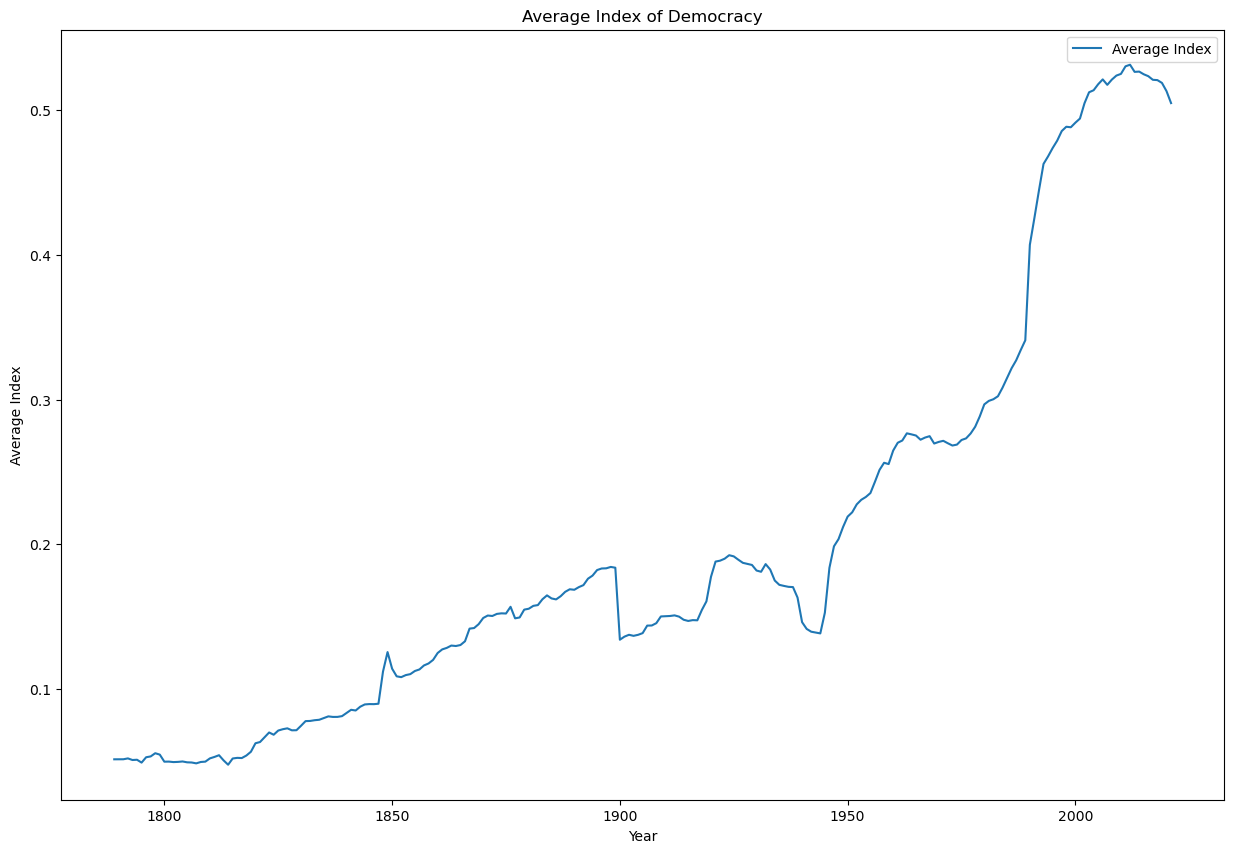

In [51]:
years = np.arange(1789,2022,1)
average = []
for year in years:
    year_data = democratic_index[democratic_index['Year'] == year]
    sum = year_data['Index'].sum()
    length = len(year_data)
    average.append(sum/length)
    
plt.figure(figsize=(15, 10))
plt.plot(years, average, label='Average Index')
plt.xlabel('Year')
plt.ylabel('Average Index')
plt.title('Average Index of Democracy')
plt.legend()

In [52]:
for year in years:
    year_data = democratic_index[democratic_index['Year'] == year]
    length = len(year_data)
    if length < 140:
        pass
    else:
        print(year, length)

1900 144
1901 144
1902 146
1903 150
1904 152
1905 151
1906 152
1907 152
1908 152
1909 152
1910 153
1911 155
1912 156
1913 156
1914 157
1915 159
1916 161
1917 161
1918 162
1919 165
1920 165
1921 164
1922 168
1923 168
1924 168
1925 168
1926 168
1927 168
1928 168
1929 168
1930 168
1931 168
1932 163
1933 163
1934 163
1935 167
1936 167
1937 167
1938 167
1939 164
1940 165
1941 166
1942 165
1943 165
1944 166
1945 170
1946 172
1947 173
1948 176
1949 177
1950 176
1951 177
1952 177
1953 177
1954 177
1955 177
1956 177
1957 177
1958 177
1959 177
1960 176
1961 177
1962 177
1963 177
1964 177
1965 177
1966 177
1967 177
1968 177
1969 177
1970 177
1971 178
1972 178
1973 178
1974 178
1975 178
1976 177
1977 177
1978 177
1979 177
1980 177
1981 177
1982 177
1983 177
1984 177
1985 177
1986 177
1987 177
1988 177
1989 177
1990 175
1991 176
1992 176
1993 176
1994 176
1995 176
1996 176
1997 176
1998 177
1999 178
2000 178
2001 178
2002 178
2003 178
2004 178
2005 178
2006 178
2007 179
2008 179
2009 179
2010 179
2

In [53]:
modern_data = democratic_index[democratic_index['Year'] >= 1900]
modern_data.head()
modern_data.to_csv('modern_data.csv')

In [54]:
modern_data.shape

(21060, 5)

In [55]:
more_data = pd.read_csv('predictions.csv')

In [56]:
countries = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia",
    "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin",
    "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia",
    "Comoros", "Congo", "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czech Republic", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "East Timor", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India",
    "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya",
    "Kiribati", "Korea, North", "Korea, South", "Kosovo", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho",
    "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand",
    "Nicaragua", "Niger", "Nigeria", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau", "Panama",
    "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda",
    "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe",
    "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands",
    "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria",
    "Taiwan", "Tajikistan", "Tanzania", "Thailand", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey",
    "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States",
    "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]
true_data = more_data[more_data['Entity'].isin(countries)]
true_data.to_csv('true_data.csv')